In [13]:
import pandas as pd
import numpy as np

df = pd.read_csv('StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [14]:
some_college = df[(df["parental level of education"] == "some college") & (df['test preparation course'] == 'completed')]
bachelor = df[(df["parental level of education"] == "bachelor's degree")  & (df['test preparation course'] == 'completed')]
high_school = df[(df["parental level of education"] == "high school")  & (df['test preparation course'] == 'completed')]

print(len(some_college))
print(len(bachelor))
print(len(high_school))

77
46
56


In [15]:
from statsmodels.stats.weightstats import ztest

ztest(some_college['math score'], bachelor['math score'], value=0, alternative='two-sided') # differece in math score

(-0.680402281999106, 0.4962497764946501)

In [16]:
ztest(bachelor['reading score'], some_college['reading score'], value=0, alternative='two-sided') # differece in reading score

(0.3138072559628261, 0.7536674331110389)

In [17]:
ztest(some_college['writing score'], bachelor['writing score'], value=0, alternative='two-sided') # differece in writing score

(-0.9546293596672626, 0.33976516441418325)

In [18]:
ztest(high_school['math score'], bachelor['math score'], value=0, alternative='two-sided') # differece in math score

(-2.9608061164980812, 0.0030683503035878776)

In [20]:
ztest(bachelor['reading score'], high_school['reading score'], value=0, alternative='two-sided') # differece in reading score

(3.253954237380074, 0.0011381061206573136)

In [21]:
ztest(high_school['writing score'], bachelor['writing score'], value=0, alternative='two-sided') # differece in writing score

(-4.041561084640954, 5.309654557273658e-05)

In [22]:
ztest(some_college['math score'], high_school['math score'], value=0, alternative='two-sided') # differece in math score

(2.7165432389131023, 0.00659675777387152)

In [23]:
ztest(high_school['reading score'], some_college['reading score'], value=0, alternative='two-sided') # differece in reading score

(-3.6629056905663044, 0.0002493703682407617)

In [24]:
ztest(some_college['writing score'], high_school['writing score'], value=0, alternative='two-sided') # differece in writing score

(3.9270874362966777, 8.598073057509024e-05)

In [51]:
df_readandwrite = df[['reading score', 'writing score']]
df_readandwrite

,reading score,writing score
0,72,74
1,90,88
2,95,93
3,57,44
4,78,75
...,...,...
995,99,95
996,55,55
997,71,65
998,78,77


The correlation coefficient r is: 0.9545980771462478


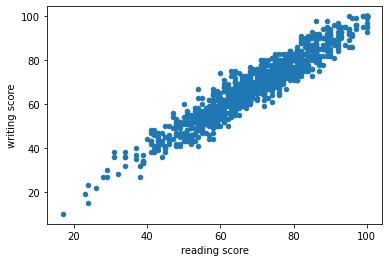

In [52]:
df_readandwrite.plot.scatter(x = 'reading score', y = 'writing score')
r = np.corrcoef(df_readandwrite['reading score'], df_readandwrite['writing score'])
print('The correlation coefficient r is:', r[0, 1])

In [53]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(df_readandwrite[['reading score']], df['writing score'])

df_readandwrite['Predicted Writing Score'] = model.predict(df_readandwrite[['reading score']])
df_readandwrite['error'] = df_readandwrite['writing score'] - df_readandwrite['Predicted Writing Score']

print('The prediction error across all students is:', df_readandwrite['error'].sum())
df_readandwrite

The prediction error across all students is: -7.794653811288299e-12


<ipython-input-53-9f2bea360e8c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_readandwrite['Predicted Writing Score'] = model.predict(df_readandwrite[['reading score']])
<ipython-input-53-9f2bea360e8c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_readandwrite['error'] = df_readandwrite['writing score'] - df_readandwrite['Predicted Writing Score']


,reading score,writing score,Predicted Writing Score,error
0,72,74,70.866687,3.133313
1,90,88,88.750247,-0.750247
2,95,93,93.717902,-0.717902
3,57,44,55.963720,-11.963720
4,78,75,76.827873,-1.827873
...,...,...,...,...
995,99,95,97.692027,-2.692027
996,55,55,53.976658,1.023342
997,71,65,69.873155,-4.873155
998,78,77,76.827873,0.172127
